In [21]:
import pandas as pd
import numpy as np
import dill as pickle
from datetime import datetime, timedelta

from cosinorage.dataloaders import GalaxyDataLoader, plot_orig_enmo, plot_enmo, plot_orig_enmo_freq
from cosinorage.features import WearableFeatures, plot_cosinor, plot_sleep_predictions, plot_non_wear

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
reload_galaxy = True

In [23]:
preprocess_args = {
    'rescale_factor': 0.0005,
    'autocalib_sd_criter': 0.01,
    'autocalib_sphere_crit': 0.02,
    'filter_type': 'lowpass',
    'filter_cutoff': 2,
    'wear_sd_crit': 0.00013,
    'wear_range_crit': 0.00067,
    'wear_window_length': 45,
    'wear_window_skip': 7,
}

In [24]:
if reload_galaxy:
    galaxy_loader = GalaxyDataLoader(gw_file_dir='../data/smartwatch/GalaxyWatch_Case1/', preprocess=True, preprocess_args=preprocess_args, verbose=True)
    with open("pickle/galaxy_loader.pkl", "wb") as file:
        pickle.dump(galaxy_loader, file)
else:
    with open("pickle/galaxy_loader.pkl", "rb") as file:
        galaxy_loader = pickle.load(file)

Read 142 files from ../data/smartwatch/GalaxyWatch_Case1/
Loaded 12537000 accelerometer data records from ../data/smartwatch/GalaxyWatch_Case1/
Filtered out 1894214/10642786 accelerometer records due to filtering out first and last day
Filtered out 0/10642786 accelerometer records due to incomplete daily coverage
Filtered out 0/10642786 minute-level accelerometer records due to filtering for longest consecutive sequence of days
Resampled 10642786 to 10800000 timestamps
Calibration done
Noise removal done
Wear detection done
Wear time calculated
Preprocessed accelerometer data
Calculated ENMO for 10800000 accelerometer records
Aggregated ENMO values at the minute level leading to 7200 records
__load_data executed in 49.86 seconds


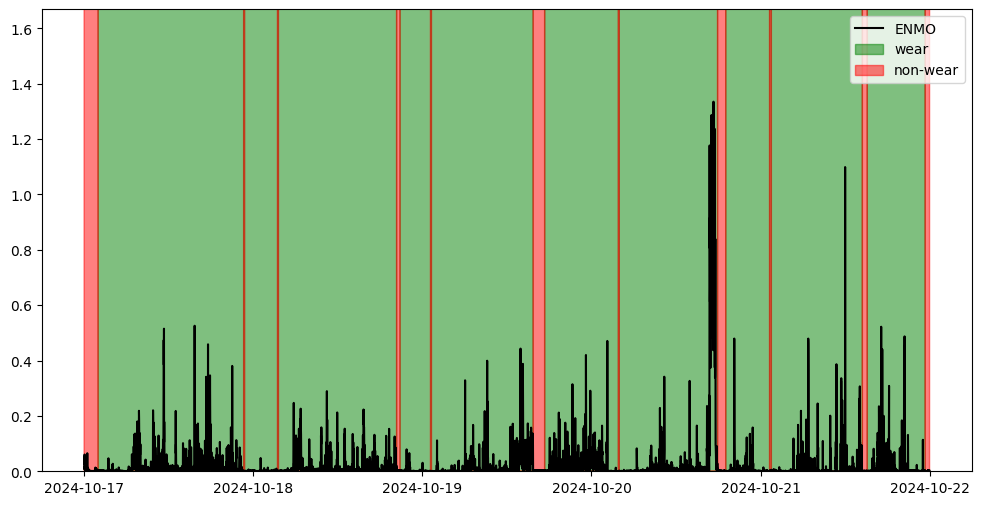

In [25]:
plot_enmo(galaxy_loader)

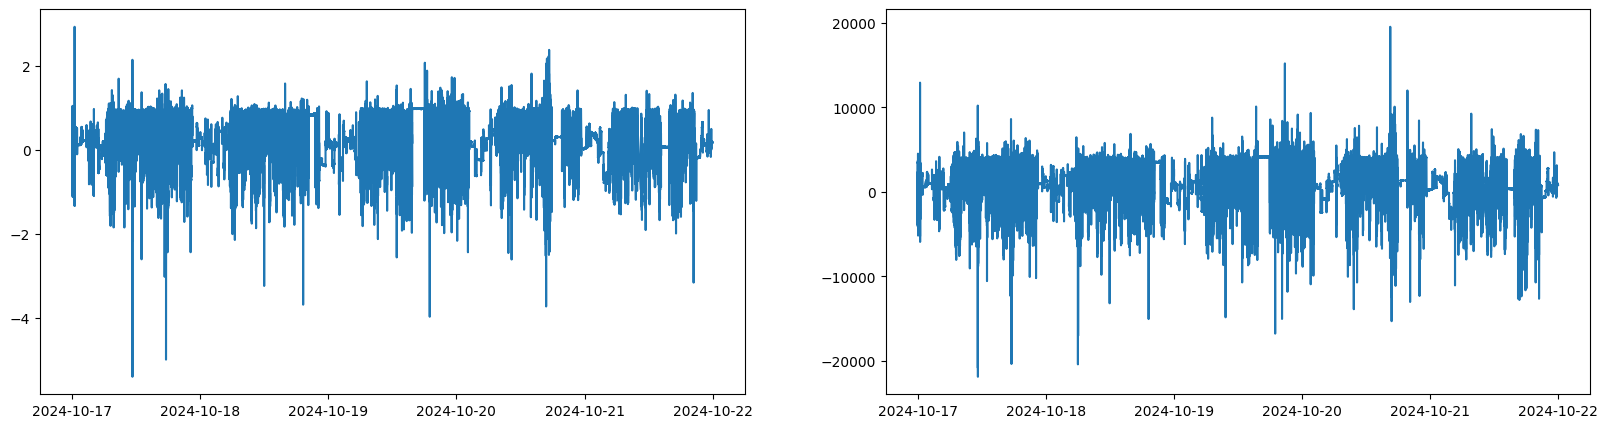

In [26]:
import matplotlib.pyplot as plt
# two plots next to each other
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(galaxy_loader.get_sf_data()['X'])
plt.subplot(1, 2, 2)
plt.plot(galaxy_loader.get_sf_data()['X_raw'])
plt.show()

In [27]:
galaxy_loader.get_meta_data()

{'datasource': 'samsung galaxy watch',
 'raw_n_timesteps': 12537000,
 'raw_n_days': 7,
 'raw_start_datetime': Timestamp('2024-10-16 21:58:17.509000'),
 'raw_end_datetime': Timestamp('2024-10-22 21:59:52.495000'),
 'raw_frequency': 'irregular (~25Hz)',
 'raw_datatype': 'accelerometer',
 'raw_unit': '',
 'resampled_n_timestamps': 10800000,
 'resampled_n_days': 5,
 'resampled_start_datetime': Timestamp('2024-10-17 00:00:00'),
 'resampled_end_datetime': Timestamp('2024-10-21 23:59:59.960000'),
 'resampled_frequency': '25Hz',
 'resampled_datatype': 'accelerometer',
 'resampled_unit': '',
 'calibration_offset': array([-0.03910105,  0.00957413, -0.00943375]),
 'calibration_scale': array([0.48589517, 0.48544801, 0.4830861 ]),
 'resampled_total_time': 431999.96,
 'resampled_wear_time': 405619.60000000003,
 'resampled_non-wear_time': 26380.359999999986}

/Users/jacobleooskar/Documents/Education/ETHZ/Curriculum/Semester03/03SemProj/CosinorAge/cosinorage/features/utils/cosinor_analysis.py:60: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  fitted_vals_df = pd.concat([fitted_vals_df, model.fittedvalues], ignore_index=False)


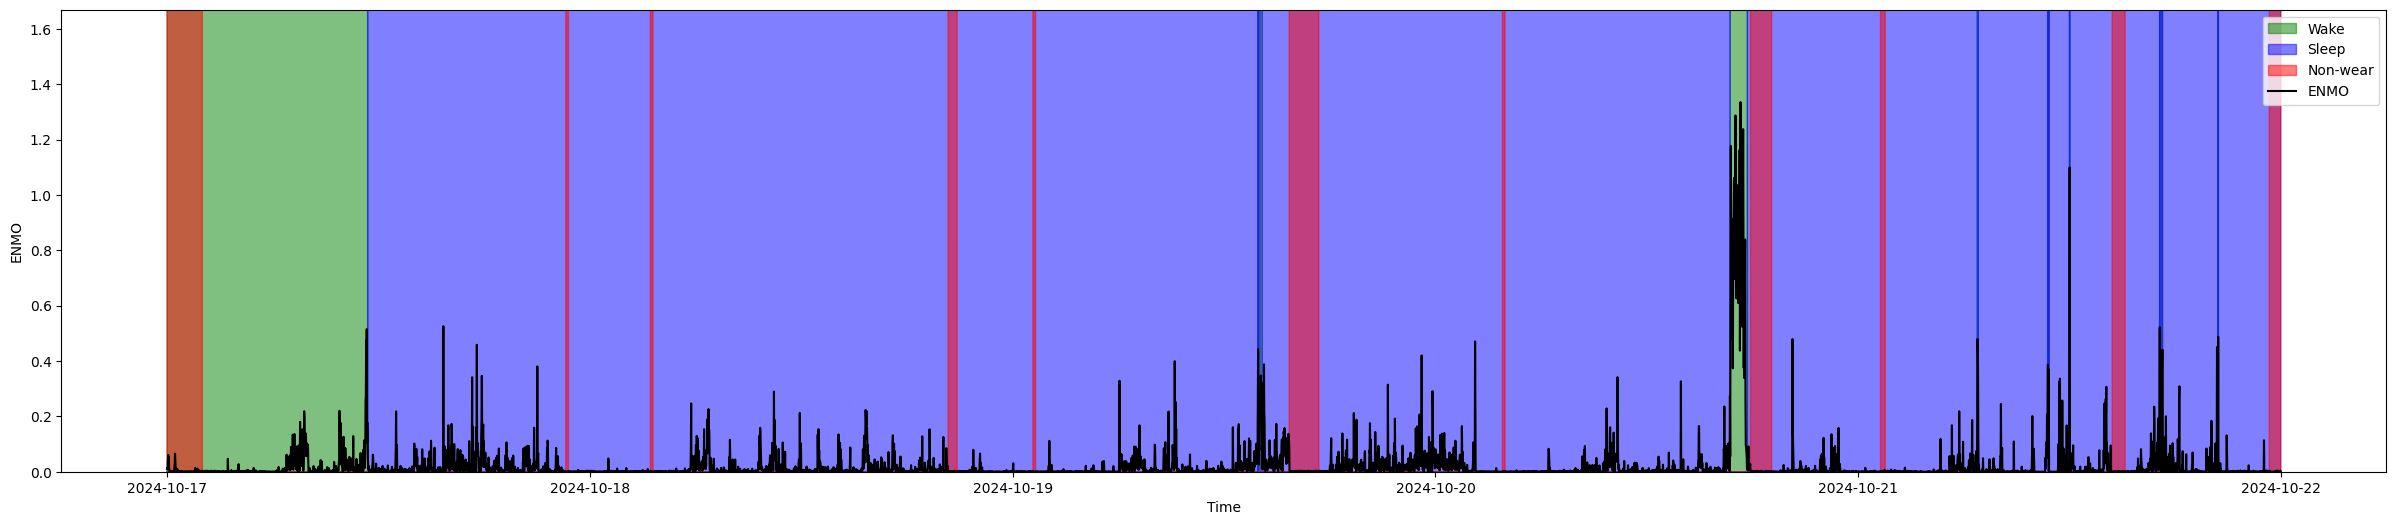

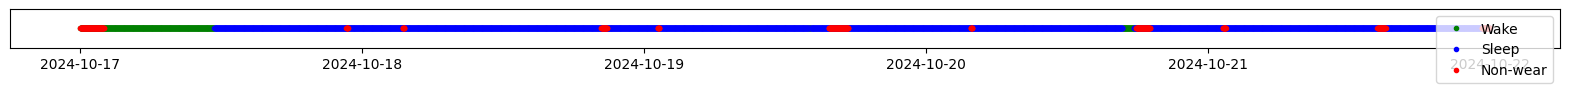

In [28]:
features = WearableFeatures(galaxy_loader)
features.run()
plot_sleep_predictions(features, simple=False)
plot_sleep_predictions(features, simple=True)

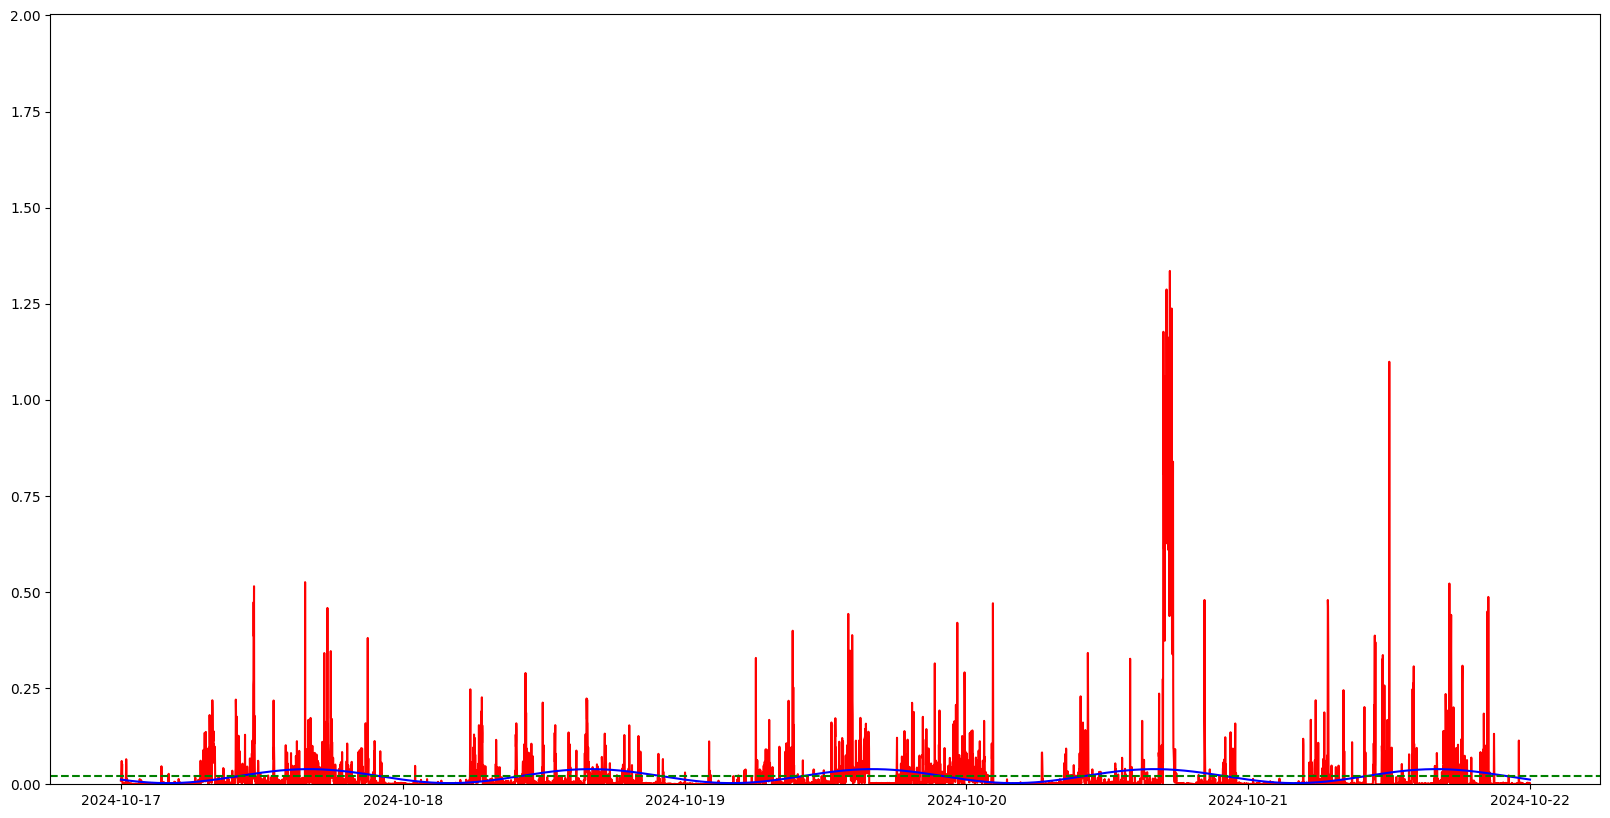

In [29]:
plot_cosinor(features, multiday=True)

In [30]:
features.get_cosinor_features()[1]

{'MESOR': 0.021230419369594966,
 'amplitude': 0.018208613470340647,
 'acrophase': 4.19356632815691,
 'acrophase_time': 16.01824344743764}